You are the owner of a supermarket and want to understand the customer's behavior. You must determine who can easily converge and became a loyal client of your supermarket [Target Customers]. To do so you need to group costumers by their behavior so the marketing team can plan their strategies accordingly.

The dataset is composed of the following information:
* CustomerID
* Gender
* Age
* Annual Income
* Spending Score (1-100): An index showing how likely a customer is to spend. Higher values mean this client has a higher probability to spend money in your supermarket.

In [21]:
#import the libraries to use k-means in the mall_customers dataset
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
from sklearn.metrics import silhouette_score


### 1. Load the data

In [22]:
#load the dataset
df = pd.read_csv('./data/Mall_Customers.csv')

#print the first 5 rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [23]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### 2. Plot the data distribution

For both numerical and categorical values

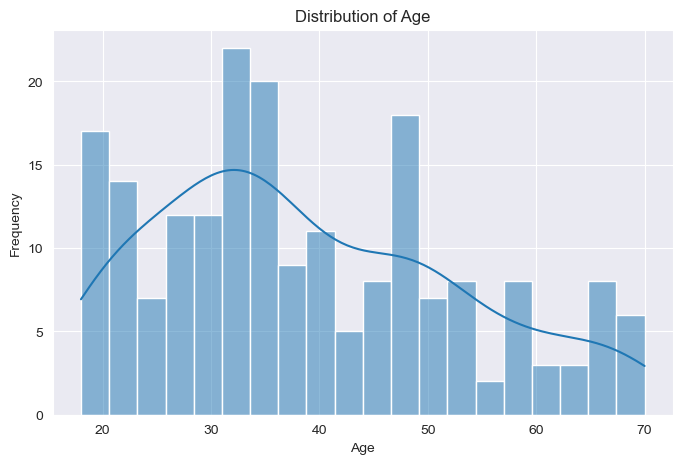

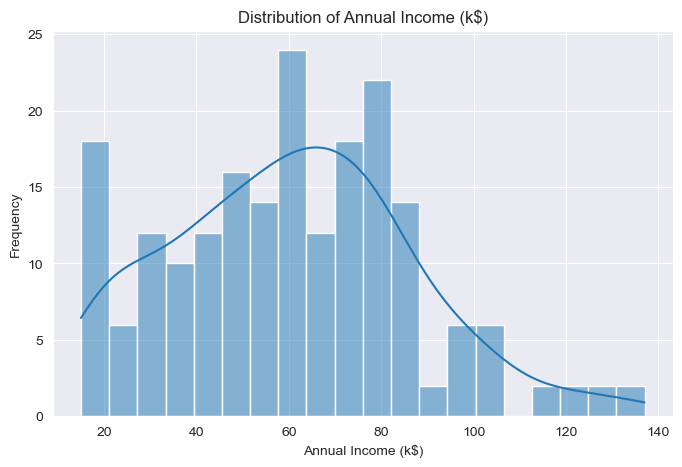

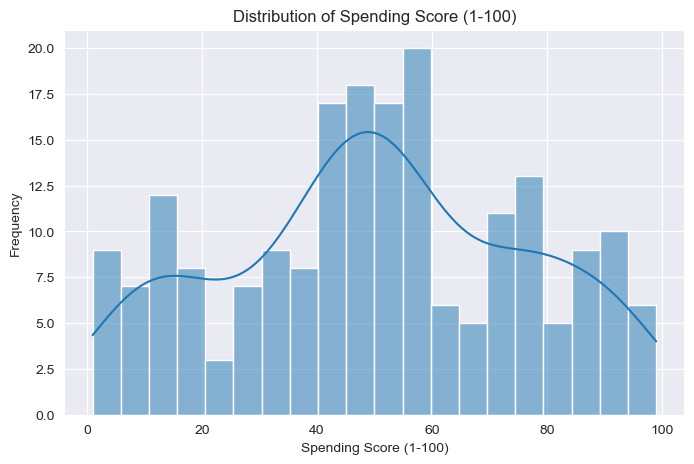

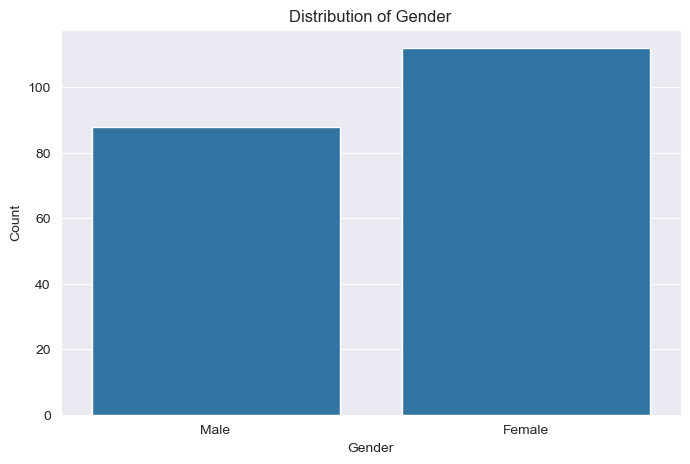

In [24]:
# Separate categorical and numerical columns
categorical_columns = df.select_dtypes(include='object')
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
numerical_columns.drop(columns=['CustomerID'], inplace=True)

# Plot distributions for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Plot distributions for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

### 3. Feature Engineering

Check for missing data

In [25]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [26]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Encoding the gender column

In [27]:
df['Gender'].head()

0      Male
1      Male
2    Female
3    Female
4    Female
Name: Gender, dtype: object

In [28]:
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


In [29]:
df['Gender'].head()

0    1
1    1
2    0
3    0
4    0
Name: Gender, dtype: int64

Scale the data

In [30]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [31]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_features, columns=df.columns)

In [32]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### 4. Implement the clustering algorithm

Implement k-means by choosing an optimal number for k and print the values of centroids

In [33]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

Plot the clusters relating annual income and spending score features 

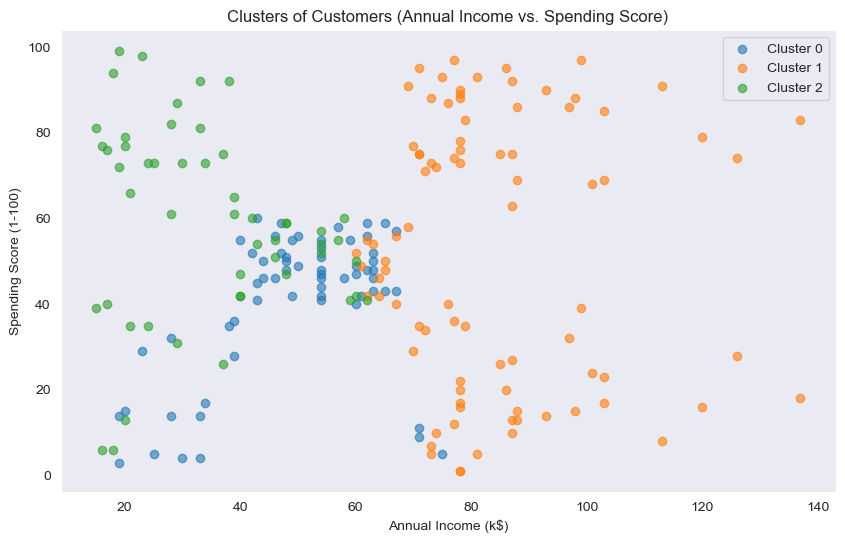

In [36]:
# 2D Visualization: Clusters with Annual Income and Spending Score
plt.figure(figsize=(10, 6))
for cluster in range(kmeans.n_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Annual Income (k$)'], 
        cluster_data['Spending Score (1-100)'], 
        label=f'Cluster {cluster}', 
        alpha=0.6
    )

plt.title('Clusters of Customers (Annual Income vs. Spending Score)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()


### 5. Evaluate the clustering quality

Plot cluster cardinality and magnitude, if needed change the numer of k in step 4 to have good values of cardinality and magnitude

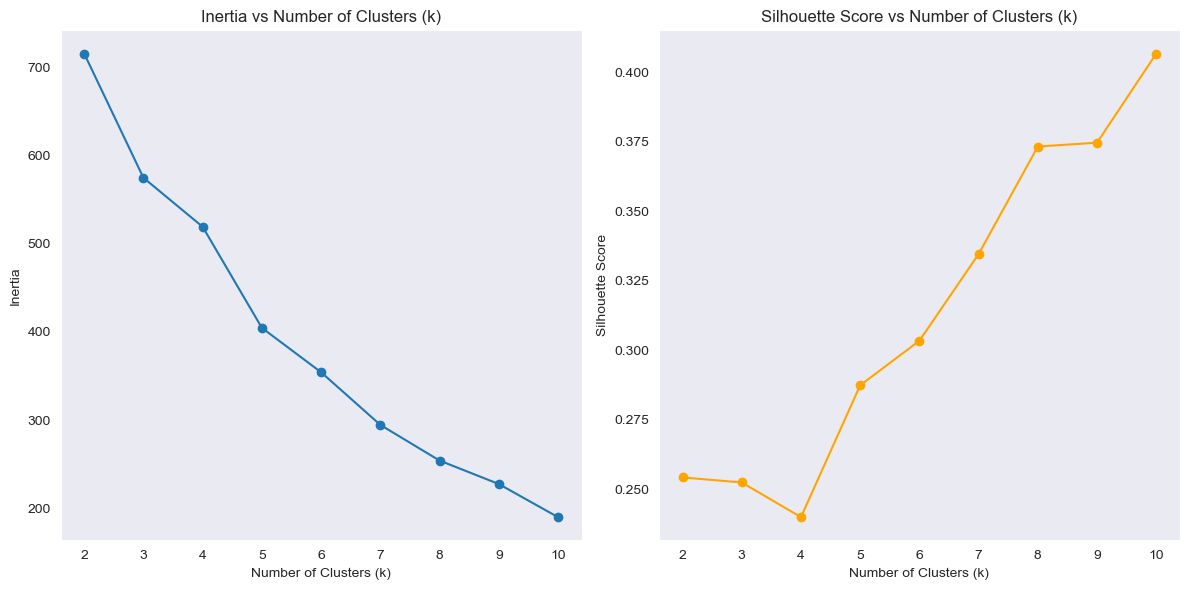

In [37]:
# Function to calculate the inertia and silhouette score for different values of k
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)  # Testing k from 2 to 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_features, labels))

# Plot inertia and silhouette score to find optimal k
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o')
plt.title('Inertia vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()

plt.tight_layout()
plt.show()


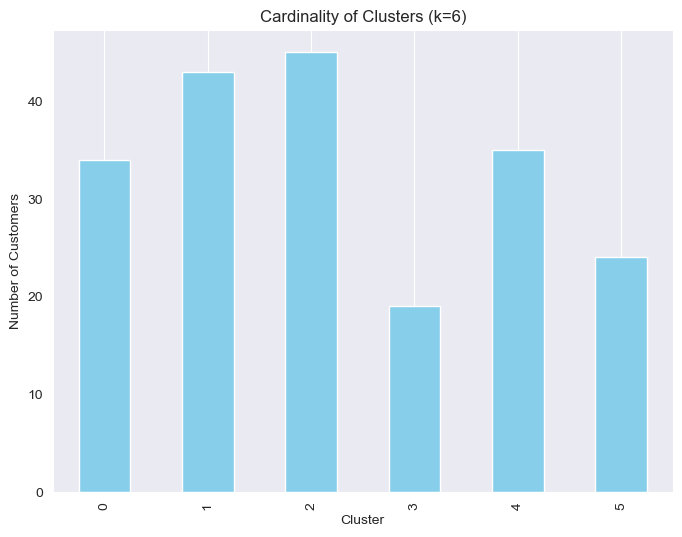

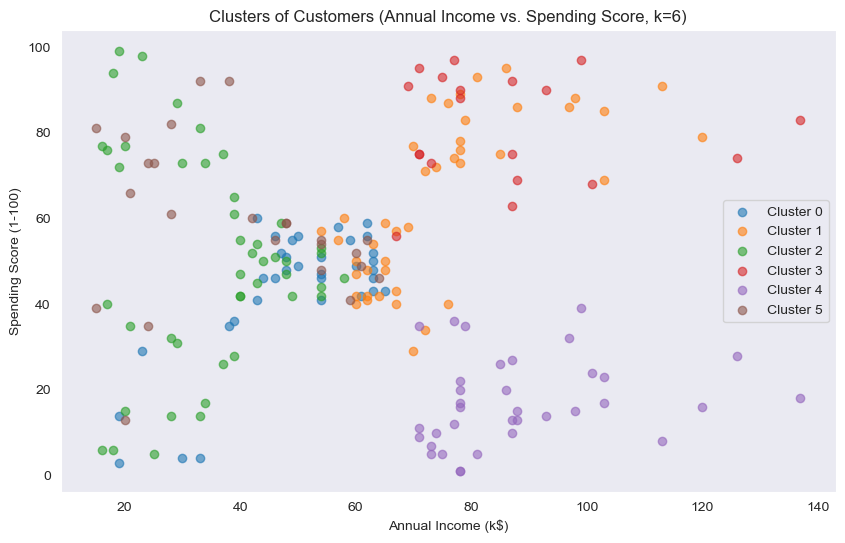

In [38]:
# Re-clustering with k=6
kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Calculate cardinality (size of each cluster)
cluster_cardinality = df['Cluster'].value_counts().sort_index()

# Plot the cardinality of each cluster
plt.figure(figsize=(8, 6))
cluster_cardinality.plot(kind='bar', color='skyblue')
plt.title('Cardinality of Clusters (k=6)')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()

# Re-plot clusters (Annual Income vs Spending Score) with k=6
plt.figure(figsize=(10, 6))
for cluster in range(6):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Annual Income (k$)'], 
        cluster_data['Spending Score (1-100)'], 
        label=f'Cluster {cluster}', 
        alpha=0.6
    )

plt.title('Clusters of Customers (Annual Income vs. Spending Score, k=6)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()


Plot the elbow method results to help you choose the right numer of clusters. If necessary, change the k in step 4 again

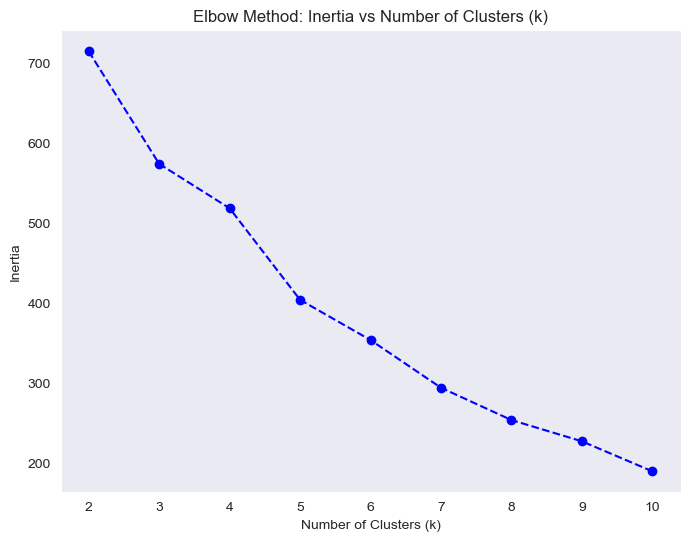

10

In [39]:
# Plotting the Elbow Method (Inertia) to choose the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--', color='blue')
plt.title('Elbow Method: Inertia vs Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(cluster_range)
plt.grid()
plt.show()

# Rechecking k for optimal clustering based on the elbow
optimal_k = 5  # Tentatively, based on the previous analysis
if silhouette_scores[cluster_range.index(optimal_k)] < max(silhouette_scores):
    optimal_k = cluster_range[silhouette_scores.index(max(silhouette_scores))]
optimal_k


Choose 10 similar data points and verify if they are allocated in the same cluster. If not, try to change k in step 4 or try to implement another similarity metric.

In [42]:
# Select 10 similar data points based on 'Annual Income (k$)' and 'Spending Score (1-100)'
# Finding points with minimal differences in these two features
similar_points = df.nsmallest(10, ['Annual Income (k$)', 'Spending Score (1-100)'])

# Check if they belong to the same cluster
similar_points_clusters = similar_points['Cluster']

# Check for consistency in clustering
all_same_cluster = similar_points_clusters.nunique() == 1

# Display the result
similar_points[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']], all_same_cluster


(    Annual Income (k$)  Spending Score (1-100)  Cluster
 0                   15                      39        5
 1                   15                      81        5
 2                   16                       6        2
 3                   16                      77        2
 4                   17                      40        2
 5                   17                      76        2
 6                   18                       6        2
 7                   18                      94        2
 8                   19                       3        0
 10                  19                      14        0,
 False)

### 6. Your recommendations to marketing team

Create a new column in your dataset named "type of client", you should give interesting names to each cluster to try to help the marketing team. 

For instance if you identify a cluster that groups clients of high incomes with high spending scores, you could call them as "Luxury shoppers". A group of young ages, low incomes but high spending scores could be named "Impulsive shoppers".

You need to explore the data in each cluster to define such names.

In [45]:
# Define cluster names based on the characteristics of each cluster
def categorize_cluster(row):
    if row['Cluster'] == 0:
        return "Cautious Spenders"
    elif row['Cluster'] == 1:
        return "Moderate Shoppers"
    elif row['Cluster'] == 2:
        return "Steady Earners"
    elif row['Cluster'] == 3:
        return "Balanced Budgets"
    elif row['Cluster'] == 4:
        return "Luxury Shoppers"
    elif row['Cluster'] == 5:
        return "High Rollers"

# Add the new column 'Type of Client' to the dataset
df['Type of Client'] = df.apply(categorize_cluster, axis=1)

df['Type of Client']

0           High Rollers
1           High Rollers
2         Steady Earners
3         Steady Earners
4         Steady Earners
             ...        
195    Moderate Shoppers
196      Luxury Shoppers
197     Balanced Budgets
198      Luxury Shoppers
199     Balanced Budgets
Name: Type of Client, Length: 200, dtype: object

Print the names of your clusters with 5 lines of example to each

In [41]:
# Group data by clusters and extract sample points for each cluster
cluster_examples = {}
for cluster in df['Cluster'].unique():
    # Get 5 random examples from each cluster
    examples = df[df['Cluster'] == cluster].sample(5, random_state=42)[
        ['CustomerID', 'Age', 'Gender', 'Annual Income (k$)', 'Spending Score (1-100)']
    ]
    cluster_examples[cluster] = examples

# Display cluster samples
cluster_examples


{5:     CustomerID  Age  Gender  Annual Income (k$)  Spending Score (1-100)
 25          26   29       1                  28                      82
 75          76   26       1                  54                      54
 0            1   19       1                  15                      39
 81          82   38       1                  54                      55
 41          42   24       1                  38                      92,
 2:     CustomerID  Age  Gender  Annual Income (k$)  Spending Score (1-100)
 71          72   47       0                  49                      42
 44          45   49       0                  39                      28
 45          46   24       0                  39                      65
 83          84   46       0                  54                      44
 58          59   27       0                  46                      51,
 0:      CustomerID  Age  Gender  Annual Income (k$)  Spending Score (1-100)
 70           71   70       1          